**PAGE REPLACEMENT ALGORITHMS:**
Page replacement algorithms are techniques used in operating systems to manage memory efficiently when the physical memory is full. When a new page needs to be loaded into physical memory, and there is no free space, these algorithms determine which existing page to replace.


**FIRST IN FIRST OUT(FIFO):** This is the simplest page replacement algorithm. In this algorithm, the operating system keeps track of all pages in the memory in a queue, the oldest page is in the front of the queue. When a page needs to be replaced page in the front of the queue is selected for removal.

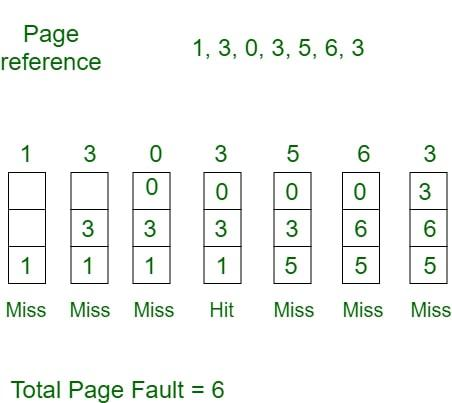

     Initially, all slots are empty, so when 1, 3, 0 came they are allocated to the empty slots —> 3 Page Faults.
     when 3 comes, it is already in memory so —> 0 Page Faults.  Then 5 comes, it is not available in memory, so it replaces the oldest page slot i.e 1. —> 1 Page Fault.  6 comes, it is also not available in memory, so it replaces the oldest page slot i.e 3 —> 1 Page Fault.  Finally, when 3 come it is not available, so it replaces 0 1-page fault.

Initially all spots are empty, so when 1, 3, 0 came they are allocated to the empty slots -> 3 page faults.

When 3 comes it is already in memory so -> 0 page faults.

Then 5 comes, it is not available in the memory so it replaces the oldest page slot which is 1. -> 1 page fault.

6 comes, it is also not available in memory, so it replaces the oldest page slot 3, -> 1 page fault.

Finaly when 3 come it is not available, so it replaces 0 -> 1 page fault.

Implementation Steps:


1.   Initialize: Create an empty queue to keep track of the pages in memory, set a maximum capacity for the queue, start with zero page faults.

2.   Process Each Page Requests:

  *   Check if the page is in memory, if yes, do nothing(no page faults)
  if no(page fault occurs), if the memory is not full, add the page to the queue
  if memory is full, remove the oldest page(front of the queue), add the new page to the back of the queue and increment the page fault counter.





In [15]:
from queue import Queue

def Fifo_page_replacement(pages, n, capacity):
  queue = Queue()
  current_pages = set()
  page_faults = 0

  for i in range(n):
    if(len(current_pages) < capacity):
      if(pages[i] not in current_pages):
        current_pages.add(pages[i])
        page_faults += 1
        queue.put(pages[i])
    else:
      if(pages[i] not in current_pages):
        current_pages.remove(queue.queue[0])
        queue.get()
        current_pages.add(pages[i])
        queue.put(pages[i])
        page_faults += 1

  return page_faults

Example Case:

In [16]:
pages = [1,3,0,3,5,6,3]
n = len(pages)
capacity = 3
print(f" page faults = {Fifo_page_replacement(pages, n, capacity)}")

 page faults = 6


**OPTIMAL PAGE REPLACEMENT ALGORITHM:**
The Optimal Page Replacement Algorithm (OPT), also known as the Belady's Algorithm, is considered the most efficient page replacement strategy because it minimizes the number of page faults.

In this algorithm, pages are replaced which would not be used for the longest duration of time in the future.

The idea is simple, for every reference we do following:

1.   If referred page is already present, increment hit count.
2.   If not present, find if a page that is never referenced in future. If such a page exists, replace this page with new page. If no such page exists, find a page that is referenced farthest in future. Replace this page with new page.

EXAMPLE WITH 3 FRAMES:

---


Reference string: 7, 0, 1, 2, 0, 3, 0, 4

1.   Start with an empty memory: [ ]
  -> Reference 7: Page fault, add 7, [7]
2.   Reference 0: Page fault, add 0: [7, 0]
3. Reference 1: Page fault, add 1: [7, 0, 1]
4. Reference 2: Page fault, replace 7 (because it is the farthest from being used), add 2: [0, 1, 2]
5. Reference 0: No page fault (already in memory)
6. Reference 3: Page fault, replace 1 (because it’s the farthest away in future), add 3: [0, 2, 3]
7. Reference 0: No page fault (already in memory).
8. Reference 4: Page fault, replace 2 (because it’s the farthest away), add 4: [0, 3, 4]

Total page faults = 6



Implementation Steps:

1. Initialize:
  *   Create an empty list or queue for storing the pages currently in memory. Set the maximum number of pages that can be stored(capacity of memory), start with zero page faults.

2. Process Each Page Request: For each page reference in the string:   

  *   Check if the page is in the memory,
    if yes -> do nothing

    if no(page fault occurs):

      *   If the memory is not full, just add the page, If memory is full find the page that will be needed furthest in the future and remove this page and insert the new page into the memory. then increment the page fault counter

3. Repeat the process until all pages in the reference string have been processed.

In [17]:
def get_page_to_replace(pages, buffer, index):
  future_use = {page: float('inf') for page in buffer}
  for i in range(index, len(pages)):
    if pages[i] in future_use and future_use[pages[i]] == float('inf'):
      future_use[pages[i]] = i
  page_to_replace = None
  farthest_use = -1

  for page in buffer:
    if future_use[page] > farthest_use:
      page_to_replace = page
      farthest_use = future_use[page]
  return page_to_replace

In [18]:
def optimal_page_replacement(pages, capacity):
  buffer = set()
  page_faults = 0

  for i in range(len(pages)):
    if pages[i] not in buffer:
      if len(buffer) < capacity:
        buffer.add(pages[i])
        page_faults += 1
      else:
        page_to_replace = get_page_to_replace(pages, buffer, i)
        buffer.remove(page_to_replace)
        buffer.add(pages[i])
        page_faults += 1

  return page_faults

In [19]:
pages = [7, 0, 1, 2, 0, 3, 0, 4]
capacity = 3
print(f"page faults = {optimal_page_replacement(pages, capacity)}")

page faults = 6


LAST RECENTLY USED ALGORITHM: In Least Recently Used (LRU) algorithm is a Greedy algorithm where the page to be replaced is least recently used. The idea is based on locality of reference, the least recently used page is not likely

Example case:
Let's say the page reference string 7 0 1 2 0 3 0 4 2 3 0 3 2 and initially we have 4 empty slots.

1. Initially all slots are empty, so when 7 0 1 2 are allocated to the empty slots -> 4 page faults

2. 0 is already there so -> 0 page faults.
3. When 3 came it will take the place of 7 because it is at least recently used -> 1 Page Fault.
4. 0 is already in memory so -> 0 page fault
5. 4 will take the place of 1 -> 1 page fault.

And the further page reference string will cause no page faults since they are already in memory. -> 0 page fault.

Total page fault = 6

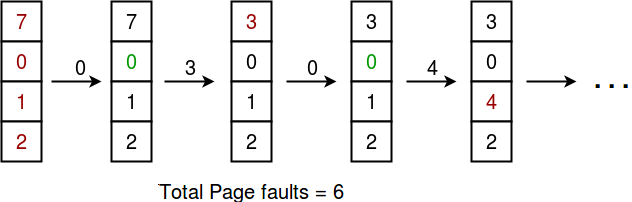

Implementation Steps:

1.   Initialize:

  *   Create an empty list or queue for storing the pages currently in memory (size of the memory)
  *   Set the maximum number of frames and page fault counter to 0


2.   Process each page request:

  *   Check if the page is in the memory,
      if yes -> update the order by moving the page to the most recently used position

      if no(page fault occurs) -> If there is space in memory, just add the new page, if memory is full, remove the last recently used page, add the new page to the most recently used position and increment the page fault counter.
3. Repeat the whole process for all page references.




In [6]:
def lru_page_replacement(pages, n, capacity):
  current_pages = set()
  indexes = {}
  page_faults = 0

  for i in range(n):
    if len(current_pages) < capacity:
      if pages[i] not in current_pages:
        current_pages.add(pages[i])
        page_faults += 1
      indexes[pages[i]] = i

    else:
      if pages[i] not in current_pages:
        lru_element = float('inf')

        for page in current_pages:
          if indexes[page] < lru_element:
            lru_element = indexes[page]
            lru_page = page
        current_pages.remove(lru_page)
        current_pages.add(pages[i])
        page_faults += 1
      indexes[pages[i]] = i

  return page_faults

In [8]:
pages = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2]
n = len(pages)
capacity = 3
print(f"page faults = {lru_page_replacement(pages, n, capacity)}")

page faults = 9


**ADAPTIVE REPLACEMENT CACHE ALGORITHM:** The Adaptive Replacement Cache (ARLU) algorithm is a more sophisticated page replacement algorithm that combines features from both LRU (Least Recently Used) and LFU (Least Frequently Used) algorithms. The goal of ARLU is to dynamically adjust between these two strategies based on the access pattern of pages, thereby improving cache hit rates over time.

How is this work : The ARLU algorithm dynamically adapts its behavior to access patterns, which makes it more efficient than using purely LRU or LFU. It typically uses two queues:

  * A Recent queue (tracks recency of access).

  * A Frequency queue (tracks how often pages are accessed).

1. Insert Page: When a page is accessed, it is moved to the most recently used queue and also gets an updated frequency count.

2. Eviction Decision: When a page needs to be replaced, ARLU considers both the recency and frequency of the pages. It chooses the page that is the least useful based on these two factors.

Example Case:
Reference String: 7, 0, 1, 2, 7, 0, 3, 4

-> Initially all pages are added to the "recently used" list.

-> When pages like 7 and 0 are accessed multiple times, they got promoted to the frequent list.

-> Pages that are accessed less frequently (like 2 and 3) might be evicted if the memory is full, based on the combined recency and frequency criteria.

Implementation Steps:

1. Set of recently used pages (LRU):
  * Use a doubly linked list or a queue to maintain the order of access (most recently used at the front).

  * Implement a mechanism to move pages to the front when accessed, to represent them as recently used.

2. Set of frequently used pages (LFU):

  * Use a min-heap or sorted list to maintain pages based on frequency of access.

  * A frequency counter is needed for each page to track how often it has been accessed.

3. Page reference list:

  * An overall list that stores the pages in memory, with both recency and frequency of access.

4. Check if the page is already in the cache (either in the recently used list or frequently used list):

  * If the page is in the recently used list:

      * Move it to the front of the recently used list (to mark it as recently accessed).

      * Increase its frequency count (moving it to the frequent list if necessary).

  * If the page is in the frequently used list:

      * Increase its frequency count.

      * Move it higher in the frequency list to maintain LFU order.

  * If the page is not in memory (a page fault occurs):

      * Check if there is space in memory:

        * If memory is not full, add the page to the recently used list.

        * If memory is full, evict a page based on both recency and frequency:

            * Evict the least frequently used page from the LFU list or the least recently used page from the LRU list (based on the algorithm’s decision).

            * Add the new page to the most recently used list and adjust its frequency.


5. Eviction Strategy:

  * Eviction: When the cache is full and a new page needs to be loaded:

      * The page chosen for eviction should be the one that is least useful, which is determined by both recency and frequency of access.

      * Two eviction strategies are available:
          1. LRU-based eviction: Remove the least recently used page (i.e., the page at the end of the recently used list).

          2. LFU-based eviction: Remove the least frequently used page (i.e., the page with the lowest frequency count).

        Depending on access patterns, the algorithm may favor one over the other, dynamically adapting to the situation.




In [2]:
from collections import deque

def adaptive_lru(pages, capacity):
  recent = deque()
  frequent = deque()
  page_faults = 0

  for page in pages:
    if page in recent:
      recent.remove(page)
      recent.append(page)
    elif page in frequent:
      frequent.remove(page)
      frequent.append(page)
    else:
      page_faults += 1
      if len(recent) + len(frequent) >= capacity:
        if len(recent) > len(frequent):
          recent.popleft()
        else:
          frequent.popleft()

      recent.append(page)
  return page_faults

In [4]:
pages = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2]
n = len(pages)
capacity = 3
print(f"page faults = {adaptive_lru(pages, capacity)}")

page faults = 9


RANDOM PAGE REPLACEMENT ALGORITHM(RAND):
The RAND (Random) page replacement algorithm is one of the simplest page replacement algorithms. Instead of tracking the least recently used or least frequently used pages, it selects a random page to evict when a new page needs to be loaded into memory.

Steps for RAND:

1. Initialize : Set of pages in memory: A collection or list to store the pages that are currently loaded in memory. The size of this list is limited by the number of available frames in memory (i.e., the cache size)

2. Process Page Access:
  * For each page in the reference string:

      * Check if the page is already in memory:

        * If yes, do nothing (no page fault).

        * If no (page fault occurs):

          * If memory is not full, simply add the new page to the memory.

          * If memory is full, select a page randomly from the memory and replace it with the new page.

          * Increment the page fault counter.


3. Eviction: When a page needs to be replaced:

    The algorithm randomly selects a page from the set of pages currently in memory (this could be done by generating a random index or using a random function to pick a page).

    The selected page is evicted and replaced with the new page.


In [9]:
import random

def rand_page_replacement(pages, n, capacity):
  current_pages = set()
  page_faults = 0

  for page in pages:
    if page in current_pages:
      continue
    else:
      if len(current_pages) < capacity:
        current_pages.add(page)
      else:
        random_page = random.choice(list(current_pages))
        current_pages.remove(random_page)
        current_pages.add(page)
      page_faults += 1

  return page_faults


In [14]:
pages = [7, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2]
n = len(pages)
capacity = 3
print(f"page faults = {rand_page_replacement(pages, n, capacity)}")

page faults = 12


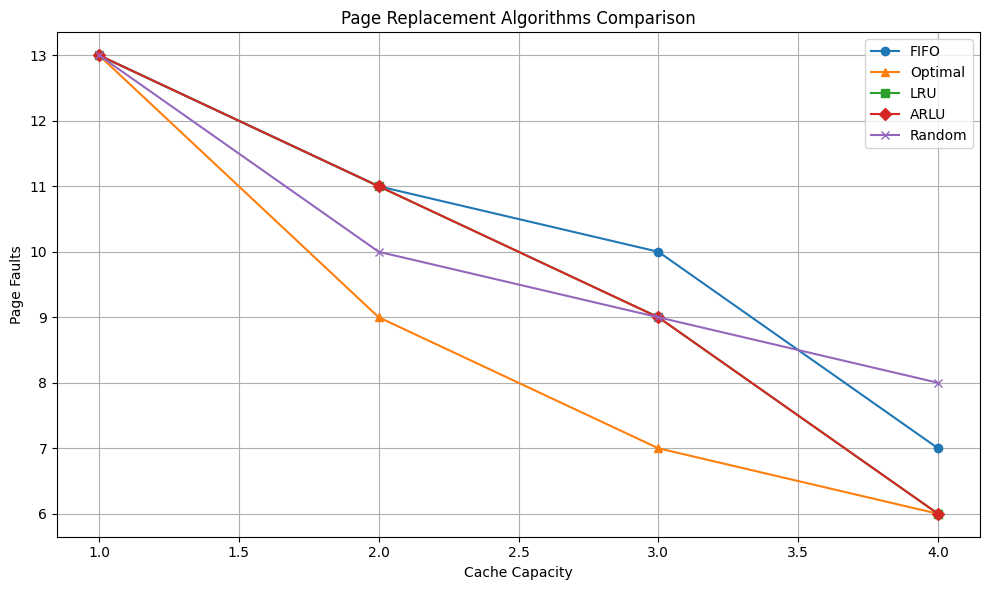

In [24]:
import matplotlib.pyplot as plt

pages = [17, 0, 1, 2, 0, 3, 0, 4, 2, 3, 0, 3, 2]

capacities = list(range(1, 5))
fifo_faults = [Fifo_page_replacement(pages, len(pages), c) for c in capacities]
optimal_faults = [optimal_page_replacement(pages, c) for c in capacities]
lru_faults = [lru_page_replacement(pages, len(pages), c) for c in capacities]
alru_faults = [adaptive_lru(pages, c) for c in capacities]
random_faults = [rand_page_replacement(pages, len(pages), c) for c in capacities]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(capacities, fifo_faults, marker='o', label='FIFO')
plt.plot(capacities, optimal_faults, marker='^', label='Optimal')
plt.plot(capacities, lru_faults, marker='s', label='LRU')
plt.plot(capacities, alru_faults, marker='D', label='ARLU')
plt.plot(capacities, random_faults, marker='x', label='Random')

plt.title('Page Replacement Algorithms Comparison')
plt.xlabel('Cache Capacity')
plt.ylabel('Page Faults')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()